In [1]:
# Stock data
import quandl
import datetime
# Analyzing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1988-08-17,9.38,9.50,9.13,9.13,134100.0,0.0,1.0,0.097708,0.098958,0.095104,0.095104,12873600.0
1,1988-08-18,9.25,9.25,8.88,9.00,133100.0,0.0,1.0,0.096354,0.096354,0.092500,0.093750,12777600.0
2,1988-08-19,9.00,9.00,8.38,8.50,251700.0,0.0,1.0,0.093750,0.093750,0.087292,0.088542,24163200.0
3,1988-08-22,8.38,8.50,7.75,8.00,306100.0,0.0,1.0,0.087292,0.088542,0.080729,0.083333,29385600.0
4,1988-08-23,8.38,8.75,8.00,8.25,473600.0,0.0,1.0,0.087292,0.091146,0.083333,0.085938,45465600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,2015-02-26,31.30,31.30,31.30,31.30,0.0,0.0,1.0,31.300000,31.300000,31.300000,31.300000,0.0
6384,2015-02-27,31.30,31.30,31.30,31.30,0.0,0.0,1.0,31.300000,31.300000,31.300000,31.300000,0.0
6385,2015-03-02,31.30,31.30,31.30,31.30,0.0,0.0,1.0,31.300000,31.300000,31.300000,31.300000,0.0
6386,2015-03-03,31.30,31.30,31.30,31.30,0.0,0.0,1.0,31.300000,31.300000,31.300000,31.300000,0.0


In [4]:
# df = df.set_index('Date')

In [5]:
means = df['Close'].mean()
stds = df['Close'].std()

In [6]:
means

31.79529117094533

In [7]:
df['Close'] = (df['Close'] - means) / stds
df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,1988-08-17,9.38,9.50,9.13,-0.994146,134100.0,0.0,1.0,0.097708,0.098958,0.095104,0.095104,12873600.0
1,1988-08-18,9.25,9.25,8.88,-0.999849,133100.0,0.0,1.0,0.096354,0.096354,0.092500,0.093750,12777600.0
2,1988-08-19,9.00,9.00,8.38,-1.021780,251700.0,0.0,1.0,0.093750,0.093750,0.087292,0.088542,24163200.0
3,1988-08-22,8.38,8.50,7.75,-1.043711,306100.0,0.0,1.0,0.087292,0.088542,0.080729,0.083333,29385600.0
4,1988-08-23,8.38,8.75,8.00,-1.032745,473600.0,0.0,1.0,0.087292,0.091146,0.083333,0.085938,45465600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,2015-02-26,31.30,31.30,31.30,-0.021724,0.0,0.0,1.0,31.300000,31.300000,31.300000,31.300000,0.0
6384,2015-02-27,31.30,31.30,31.30,-0.021724,0.0,0.0,1.0,31.300000,31.300000,31.300000,31.300000,0.0
6385,2015-03-02,31.30,31.30,31.30,-0.021724,0.0,0.0,1.0,31.300000,31.300000,31.300000,31.300000,0.0
6386,2015-03-03,31.30,31.30,31.30,-0.021724,0.0,0.0,1.0,31.300000,31.300000,31.300000,31.300000,0.0


In [8]:
Next_N_Day = 30
X = df.drop(df.tail(Next_N_Day).index)
X = X['Close']
X = X.to_frame()
X
# df

,Close
0,-0.994146
1,-0.999849
2,-1.021780
3,-1.043711
4,-1.032745
...,...
6353,-0.021724
6354,-0.021724
6355,-0.021724
6356,-0.021724


In [9]:
# X = X.reset_index()
# X = X.drop(['Date'], axis = 1)
# X

In [10]:
y = df["Close"]
y = y.drop(y.head(Next_N_Day).index)
y = y.reset_index()
y = y.drop(['index'], axis = 1)
y
# y = df['Close']
# y = y.iloc[len(df.index)-Next_N_Day:]
# y.shape

,Close
0,-0.934055
1,-0.945021
2,-0.955986
3,-0.966952
4,-0.972215
...,...
6353,-0.021724
6354,-0.021724
6355,-0.021724
6356,-0.021724


In [88]:
test_X = X[len(X)-Next_N_Day:len(X)]
print(test_X.shape)
test_y = y[len(y)-Next_N_Day:len(y)]
print(test_y.shape)

X = X[0:len(X)-Next_N_Day-1]
print(X.shape)
y = y[0:len(y)-Next_N_Day-1]
print(y.shape)

test_y = test_y.reset_index()
test_y = test_y.drop(['index'], axis = 1)
# test_y

test_X = test_X.reset_index()
test_X = test_X.drop(['index'], axis = 1)
# test_X

(30, 1)
(30, 1)
(5862, 1)
(5862, 1)


In [117]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 42)

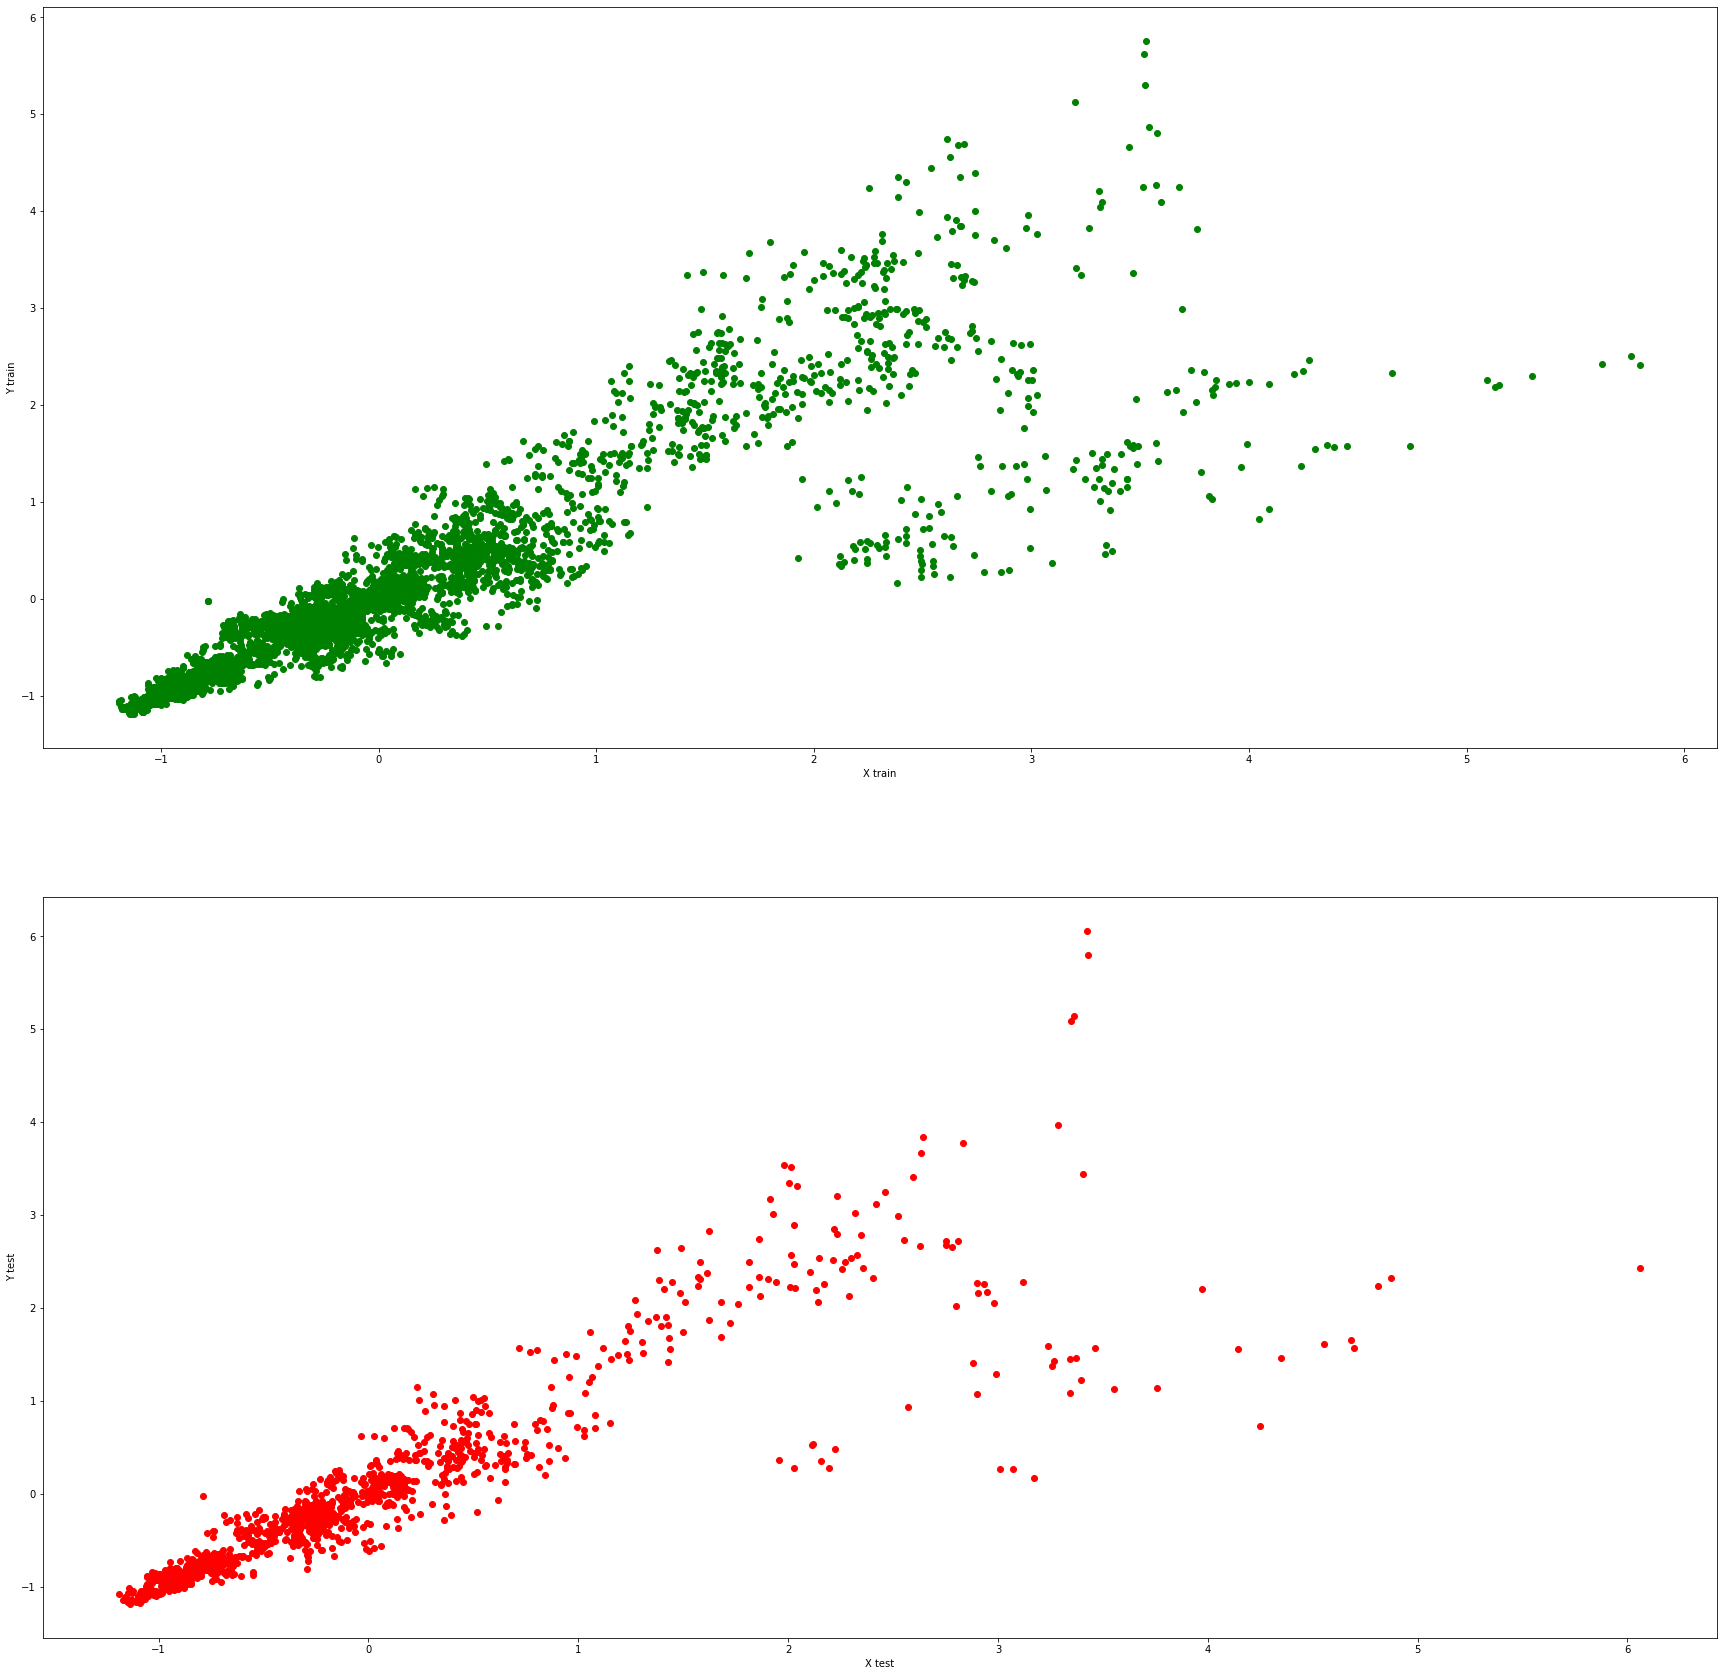

In [13]:
fig = plt.figure(figsize = (30, 30))
ax = fig.add_subplot(2, 1, 1)
ax.scatter(X_train, y_train, marker = 'o', color = 'g')
ax.set_title = ('X,y train')
ax.set_xlabel('X train')
ax.set_ylabel('Y train')

ax = fig.add_subplot(2, 1, 2)
ax.scatter(X_test, y_test, marker = 'o', color = 'r')
ax.set_title = ('X,y test')
ax.set_xlabel('X test')
ax.set_ylabel('Y test')

plt.show()

In [14]:
c_val = 1000
gmm = 0.1
model_li = LinearRegression()
model_svr_li = SVR(kernel='linear', C=c_val)
model_svr_rbf = SVR(kernel='rbf', C=c_val, gamma=gmm)
model_svr_pol = SVR(kernel='poly', C=c_val, degree=2)
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state = seed, shuffle=True)
score_model_li = model_selection.cross_val_score(model_li, X_train, y_train, cv = kfold)
score_svr_li = model_selection.cross_val_score(model_svr_li, X_train, y_train, cv = kfold)
score_svr_rbf = model_selection.cross_val_score(model_svr_rbf, X_train, y_train, cv = kfold)
score_svr_pol = model_selection.cross_val_score(model_svr_pol, X_train, y_train, cv = kfold)

C:\Users\kanis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kanis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kanis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kanis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [15]:
print(score_model_li)
print(score_svr_li)
print(score_svr_rbf)
print(score_svr_pol)

[0.77446091 0.82459604 0.75290509 0.82561133 0.76572613 0.81197222
 0.77381164 0.78762294 0.81263046 0.81693412]
[0.7525628  0.83472277 0.72274209 0.82910524 0.75543836 0.81188171
 0.73134979 0.76537254 0.81476008 0.81177683]
[0.87459436 0.79962456 0.82267304 0.81224845 0.83077756 0.84693867
 0.86084882 0.85460519 0.88803252 0.89042361]
[0.28045862 0.30591459 0.28273435 0.31107976 0.28306614 0.28579817
 0.30142246 0.25436696 0.22787043 0.2591555 ]


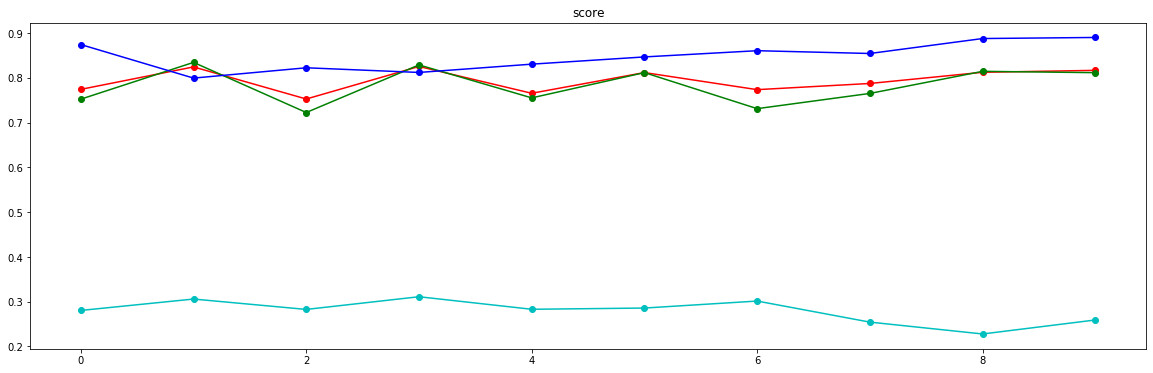

In [55]:
fig = plt.figure(figsize = (20, 6))

plt.plot(score_model_li, marker = 'o', color = 'r')
plt.plot(score_svr_li, marker = 'o', color = 'g')
plt.plot(score_svr_rbf, marker = 'o', color = 'b')
plt.plot(score_svr_pol, marker = 'o', color = 'c')
plt.title('score')
plt.show()



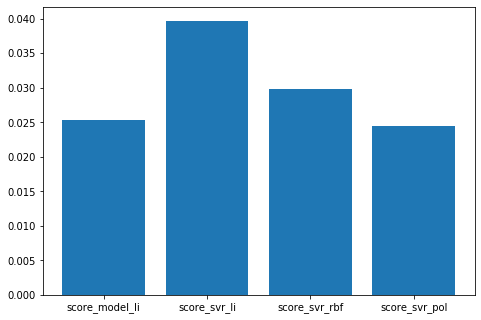

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['score_model_li', 'score_svr_li', 'score_svr_rbf', 'score_svr_pol']
students = [score_model_li.std(),score_svr_li.std(),score_svr_rbf.std(),score_svr_pol.std()]
ax.bar(langs,students)
plt.show()

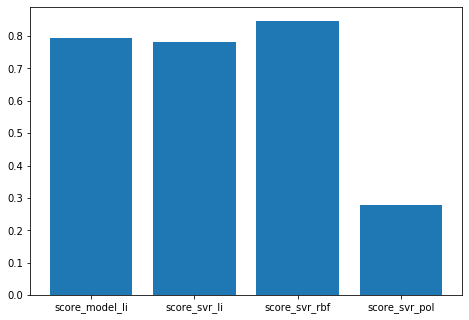

In [58]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['score_model_li', 'score_svr_li', 'score_svr_rbf', 'score_svr_pol']
students = [score_model_li.mean(),score_svr_li.mean(),score_svr_rbf.mean(),score_svr_pol.mean()]
ax.bar(langs,students)
plt.show()

In [16]:
model_li.fit(X_train, y_train)
model_svr_li.fit(X_train, y_train)
model_svr_pol.fit(X_train, y_train)
model_svr_rbf.fit(X_train, y_train)

C:\Users\kanis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kanis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kanis\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
li_pred = model_li.predict(test_X)
svr_li_pred = model_svr_li.predict(test_X)
svr_rbf_pred = model_svr_rbf.predict(test_X)
svr_pol_pred = model_svr_pol.predict(test_X)

li_pred_v = model_li.predict(X_test)
svr_li_pred_v = model_svr_li.predict(X_test)
svr_rbf_pred_v = model_svr_rbf.predict(X_test)
svr_pol_pred_v = model_svr_pol.predict(X_test)

In [23]:
print('Test')
print('<<mean_squared_error>>')
print('linear')
print(metrics.mean_squared_error(test_y, li_pred))
print('svr linear')
print(metrics.mean_squared_error(test_y, svr_li_pred))
print('svr rbf')
print(metrics.mean_squared_error(test_y, svr_rbf_pred))
print('svr poly')
print(metrics.mean_squared_error(test_y, svr_pol_pred))
print('<<r2_score>>')
print('linear')
print(metrics.r2_score(test_y, li_pred))
print('svr linear')
print(metrics.r2_score(test_y, svr_li_pred))
print('svr rbf')
print(metrics.r2_score(test_y, svr_rbf_pred))
print('svr poly')
print(metrics.r2_score(test_y, svr_pol_pred))

Test
<<mean_squared_error>>
linear
0.3865689471088403
svr linear
0.461309383678951
svr rbf
0.44426748298813146
svr poly
0.025052802919497737
<<r2_score>>
linear
-8.02872291872139e+33
svr linear
-9.58102105475542e+33
svr rbf
-9.2270746250738e+33
svr poly
-5.2032635958560104e+32


In [63]:
print('Validation')
print('<<mean_squared_error>>')
print('linear')
print(metrics.mean_squared_error(y_test, li_pred_v))
print('svr linear')
print(metrics.mean_squared_error(y_test, svr_li_pred_v))
print('svr rbf')
print(metrics.mean_squared_error(y_test, svr_rbf_pred_v))
print('svr poly')
print(metrics.mean_squared_error(y_test, svr_pol_pred_v))
print('<<r2_score>>')
print('linear')
print(metrics.r2_score(y_test, li_pred_v))
print('svr linear')
print(metrics.r2_score(y_test, svr_li_pred_v))
print('svr rbf')
print(metrics.r2_score(y_test, svr_rbf_pred_v))
print('svr poly')
print(metrics.r2_score(y_test, svr_pol_pred_v))

Validation
<<mean_squared_error>>
linear
0.20627523370933198
svr linear
0.22799198968360915
svr rbf
0.1399830392275391
svr poly
0.6942495925377855
<<r2_score>>
linear
0.7845926838919837
svr linear
0.7619144978835577
svr rbf
0.8538197231028846
svr poly
0.2750150430158851


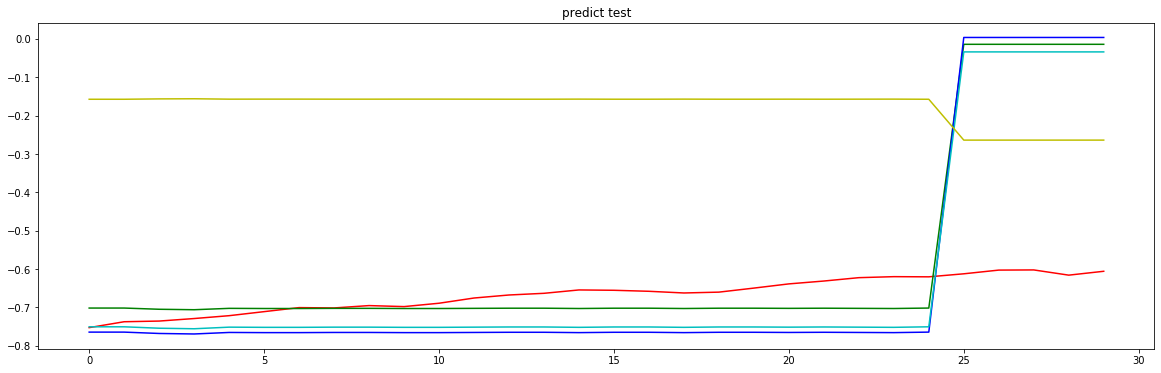

In [111]:
fig = plt.figure(figsize = (20, 6))

plt.plot(test_y, color = 'r')
plt.plot(li_pred, color = 'g')
plt.plot(svr_li_pred, color = 'b')
plt.plot(svr_rbf_pred, color = 'c')
plt.plot(svr_pol_pred, color = 'y')
plt.title('predict test')
plt.show()




In [132]:
# fig = plt.figure(figsize = (20, 6))

# y_test = y_test.sort_index()

# plt.plot(li_pred_v, color = 'g')
# plt.plot(svr_li_pred_v, color = 'b')
# plt.plot(svr_rbf_pred_v, color = 'c')
# plt.plot(svr_pol_pred_v, color = 'y')
# plt.plot(y_test, color = 'r')
# plt.title('predict validate')
# plt.show()

# print(y_test.shape)